<a href="https://colab.research.google.com/github/Mounaiim/Trading_Strategy/blob/main/Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from google.colab import files


In [207]:
# CMD + M O to hide output 
files.upload()

Saving silver.csv to silver (15).csv


{'silver.csv': b'Date,Open,High,Low,Close,Volume,Currency\n2000-01-04,5.42,5.42,5.32,5.375,27560,USD\n2000-01-05,5.375,5.38,5.16,5.21,13515,USD\n2000-01-06,5.205,5.215,5.15,5.167,4729,USD\n2000-01-07,5.17,5.215,5.15,5.195,5375,USD\n2000-01-10,5.19,5.23,5.17,5.19,4278,USD\n2000-01-11,5.19,5.22,5.19,5.195,18507,USD\n2000-01-12,5.205,5.225,5.125,5.143,10288,USD\n2000-01-13,5.14,5.175,5.125,5.153,5478,USD\n2000-01-14,5.16,5.18,5.13,5.15,9314,USD\n2000-01-18,5.16,5.19,5.125,5.165,6171,USD\n2000-01-19,5.17,5.19,5.14,5.173,21749,USD\n2000-01-20,5.18,5.285,5.155,5.257,10709,USD\n2000-01-21,5.26,5.3,5.23,5.26,8764,USD\n2000-01-24,5.26,5.32,5.255,5.293,9412,USD\n2000-01-25,5.295,5.36,5.29,5.315,7333,USD\n2000-01-26,5.32,5.325,5.255,5.283,28433,USD\n2000-01-27,5.28,5.43,5.255,5.415,20618,USD\n2000-01-28,5.415,5.5,5.32,5.327,12660,USD\n2000-01-31,5.31,5.36,5.275,5.317,10949,USD\n2000-02-01,5.32,5.325,5.23,5.253,9726,USD\n2000-02-02,5.255,5.315,5.235,5.24,7032,USD\n2000-02-03,5.24,5.295,5.235,5.288

In [208]:
df = pd.read_csv('silver.csv')

df

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,5.420,5.420,5.320,5.375,27560,USD
1,2000-01-05,5.375,5.380,5.160,5.210,13515,USD
2,2000-01-06,5.205,5.215,5.150,5.167,4729,USD
3,2000-01-07,5.170,5.215,5.150,5.195,5375,USD
4,2000-01-10,5.190,5.230,5.170,5.190,4278,USD
...,...,...,...,...,...,...,...
5675,2022-07-27,18.535,19.095,18.360,18.600,62255,USD
5676,2022-07-28,19.050,20.000,19.010,19.868,86522,USD
5677,2022-07-29,19.990,20.350,19.825,20.197,60985,USD
5678,2022-07-31,20.328,20.330,20.177,20.203,0,USD


In [209]:
#read the file
df = pd.read_csv('silver.csv')


#set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#remove or drop date column and currency column
df.drop(['Date'], inplace = True, axis = 1)
df.drop(['Currency'], inplace = True, axis = 1)

#show data
df

,Open,High,Low,Close,Volume
2000-01-04,5.420,5.420,5.320,5.375,27560
2000-01-05,5.375,5.380,5.160,5.210,13515
2000-01-06,5.205,5.215,5.150,5.167,4729
2000-01-07,5.170,5.215,5.150,5.195,5375
2000-01-10,5.190,5.230,5.170,5.190,4278
...,...,...,...,...,...
2022-07-27,18.535,19.095,18.360,18.600,62255
2022-07-28,19.050,20.000,19.010,19.868,86522
2022-07-29,19.990,20.350,19.825,20.197,60985
2022-07-31,20.328,20.330,20.177,20.203,0


In [210]:
#Calculate the simple moving average

def SMA(data, period = 30, column = 'Close'):
  return data[column].rolling(window=period).mean()

In [211]:
#Build the data set
df['SMA'] = SMA(df, 21)
df['Simple_Returns'] = df.pct_change(1)['Close']
df['Log_Returns'] =np.log(1+df['Simple_Returns'])
df['Ratios'] = df['Close'] / df['SMA']

#show the data
df

,Open,High,Low,Close,Volume,SMA,Simple_Returns,Log_Returns,Ratios
2000-01-04,5.420,5.420,5.320,5.375,27560,NaN,NaN,NaN,NaN
2000-01-05,5.375,5.380,5.160,5.210,13515,NaN,-0.030698,-0.031179,NaN
2000-01-06,5.205,5.215,5.150,5.167,4729,NaN,-0.008253,-0.008288,NaN
2000-01-07,5.170,5.215,5.150,5.195,5375,NaN,0.005419,0.005404,NaN
2000-01-10,5.190,5.230,5.170,5.190,4278,NaN,-0.000962,-0.000963,NaN
...,...,...,...,...,...,...,...,...,...
2022-07-27,18.535,19.095,18.360,18.600,62255,19.113810,0.003507,0.003501,0.973118
2022-07-28,19.050,20.000,19.010,19.868,86522,19.069143,0.068172,0.065949,1.041893
2022-07-29,19.990,20.350,19.825,20.197,60985,19.043381,0.016559,0.016424,1.060578
2022-07-31,20.328,20.330,20.177,20.203,0,19.036286,0.000297,0.000297,1.061289


In [212]:
#Get Stats on the ration column
df['Ratios'].describe()

count    5660.000000
mean        1.002828
std         0.048369
min         0.709452
25%         0.977513
50%         1.001096
75%         1.030193
max         1.259299
Name: Ratios, dtype: float64

In [213]:
#Get and show the percentile values
percentiles = [15, 20, 50, 80, 85]

#remove any NAN values in the Ratios column and store in a new variable called ratios
ratios = df['Ratios'].dropna()

#Get the values of the percentiles
percentile_values = np.percentile(ratios, percentiles)

#Show the values of the percentiles
percentile_values

array([0.96074542, 0.97031886, 1.00109647, 1.03885139, 1.04790344])

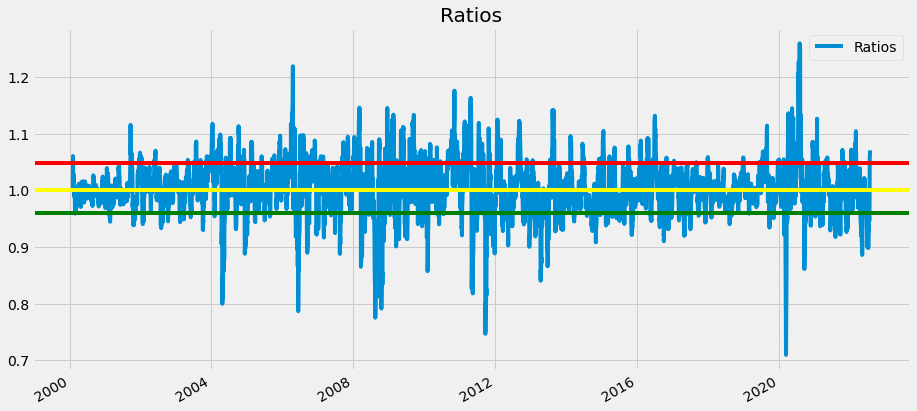

In [214]:
#Plot the ratios
plt.figure(figsize=(14,7))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend = True)
plt.axhline(percentile_values[0], c='green', label = '15th percentile')
plt.axhline(percentile_values[2], c='yellow', label = '50th percentile')
plt.axhline(percentile_values[-1], c='red', label = '75th percentile')


In [215]:
#Create buy and sell signals for the trategy
sell = percentile_values[-1] #The 85th percentile threshold where we want to sell   
buy = percentile_values[0]#the 15th percentile threshold where we want buy
#Put -1where the ratio is greater than percentile to sell and nan otherwise

df['Positions'] = np.where(df.Ratios > sell, -1, np.nan)
#Put 1 where the ratio is less than the percentile to buy and put the current value otherwise
df['Positions'] = np.where(df.Ratios < buy, 1, df['Positions'])
#Use ffill to fill the missing values in the data frame. fflil stands for forward fill
df['Positions'] = df['Positions'].ffill()

#Get the buy and sell signals
df['Buy']= np.where(df.Positions == 1, df['Close'], np.nan)
df['Sell']= np.where(df.Positions == -1, df['Close'], np.nan)

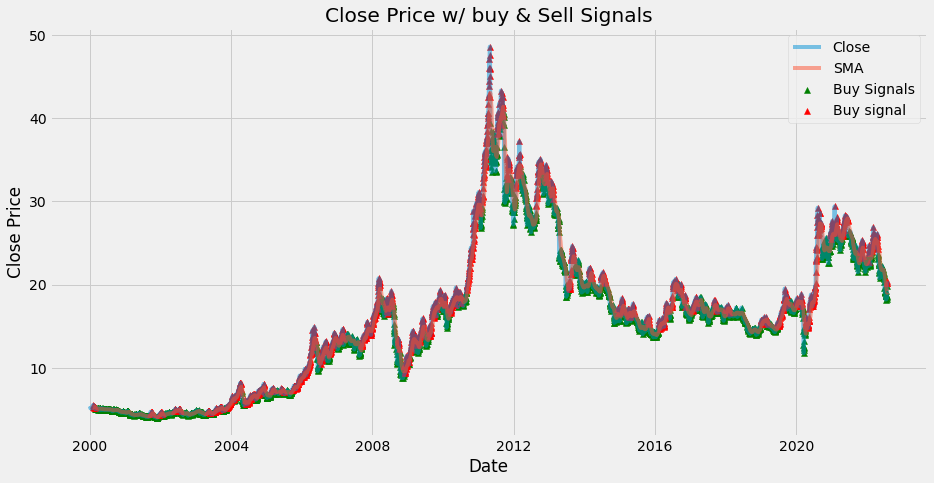

In [216]:
#Visualize the buy and sell signals along witht he close price
plt.figure(figsize=(14,7))
plt.title('Close Price w/ buy & Sell Signals')
plt.plot(df['Close'], alpha = 0.5, label='Close')
plt.plot(df['SMA'], alpha = 0.5, label='SMA')
plt.scatter(df.index, df['Buy'], color='green', label = 'Buy Signals', marker='^', alpha = 1)
plt.scatter(df.index, df['Sell'], color='red', label = 'Buy signal', marker='^', alpha = 1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [217]:
df['Strategy_Returns'] = df.Positions.shift(1) * df.Log_Returns
df['Strategy_Returns']

2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
                ...   
2022-07-27    0.003501
2022-07-28    0.065949
2022-07-29    0.016424
2022-07-31   -0.000297
2022-08-01   -0.010439
Name: Strategy_Returns, Length: 5680, dtype: float64

In [218]:
#Plot cumulative log turns and the cumulative Mean Reversion Strategy

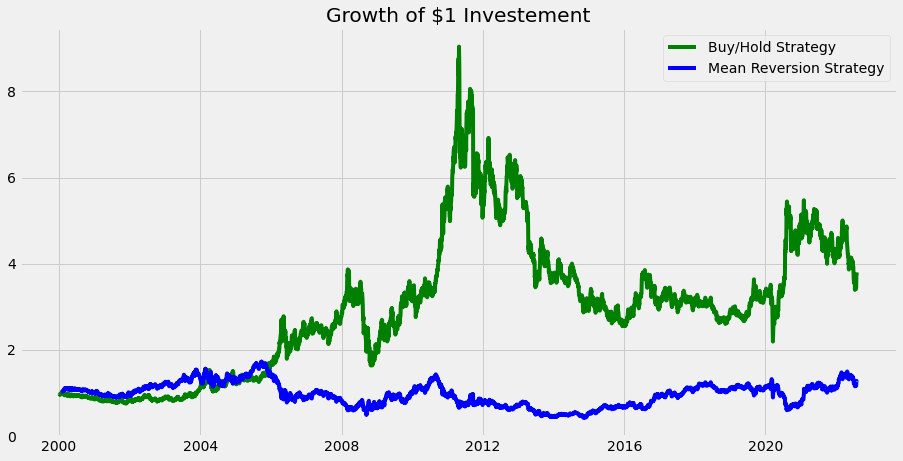

In [219]:
plt.figure(figsize=(14,7))
plt.title('Growth of $1 Investement')
plt.plot(np.exp(df['Log_Returns'].dropna()).cumprod(), c = 'green', label = 'Buy/Hold Strategy')
plt.plot(np.exp(df['Strategy_Returns'].dropna()).cumprod(), c = 'blue', label = 'Mean Reversion Strategy')
plt.legend()



In [220]:
#Print the retuns for both strategies

print('Buy and Hold Strategy Returns: ', np.exp(df['Log_Returns'].dropna()).cumprod()[-1] -1)
print('Mean Reversion Strategy Returns: ', np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1] -1)

Buy and Hold Strategy Returns:  2.7981395348836893
Mean Reversion Strategy Returns:  0.26283713820881105
